In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
def rng_numb(numb):
	return round(rng()*numb)
def g_test(x,start=0.5,end=0.5):
	return stats.ttest_ind(x[:int(len(x)*start)],x[-int(len(x)*end):],equal_var = False)
def plot_grid(narr):
    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())

rng.current = 1
"""основные функции"""

'основные функции'

In [2]:
def step(narr,n,n_e):
	s = 0
	for i in range(n):
		for k in range(n):
			if narr[i][k]:
				s+=1
			else:
				dir = 0
				if i>0:
					if not narr[i-1][k]:
						dir+=1
				else:
					dir+=1
				if i<n-1:
					if not narr[i+1][k]:
						dir+=1
				else:
					dir+=1
				if k>0:
					if not narr[i][k-1]:
						dir+=1
				else:
					dir+=1
				if k<n-1:
					if not narr[i][k+1]:
						dir+=1
				else:
					dir+=1
				if dir == 4:
					s+=1
	cho1 = rng_numb(s+1)-1
	if s == 0:
		n_e[0]+=1
		return 0
	s = 0
	for i in range(n):
		for k in range(n):
			if narr[i][k]:
				s+=1
				if s == cho1:
					narr[i][k] = False
			else:
				dir = 0
				if i>0:
					if not narr[i-1][k]:
						dir+=1
				else:
					dir+=1
				if i<n-1:
					if not narr[i+1][k]:
						dir+=1
				else:
					dir+=1
				if k>0:
					if not narr[i][k-1]:
						dir+=1
				else:
					dir+=1
				if k<n-1:
					if not narr[i][k+1]:
						dir+=1
				else:
					dir+=1
				if dir == 4:
					s+=1
					if s == cho1:
						narr[i][k] = True
	mas_tr = narr[narr == True]
	n_e[len(mas_tr)]+=1
	return len(mas_tr)
"""шаг цепи"""

'шаг цепи'

In [3]:
size = 8
narr = np.zeros(size**2).reshape((size, size)).astype('bool')
n_e = np.zeros(size**2)#количество вхождений в допустимую конфигурацию для каждого количества черных вершин
n_e[0] = 1
sam = []
for _ in range(100000):
	sam.append(step(narr,8,n_e))
Ee = 0
for i in range(size**2):
	Ee += i*n_e[i]/n_e.sum()
print(Ee)
"""оценка мат ожидания"""

15.224157758422416


'оценка мат ожидания'

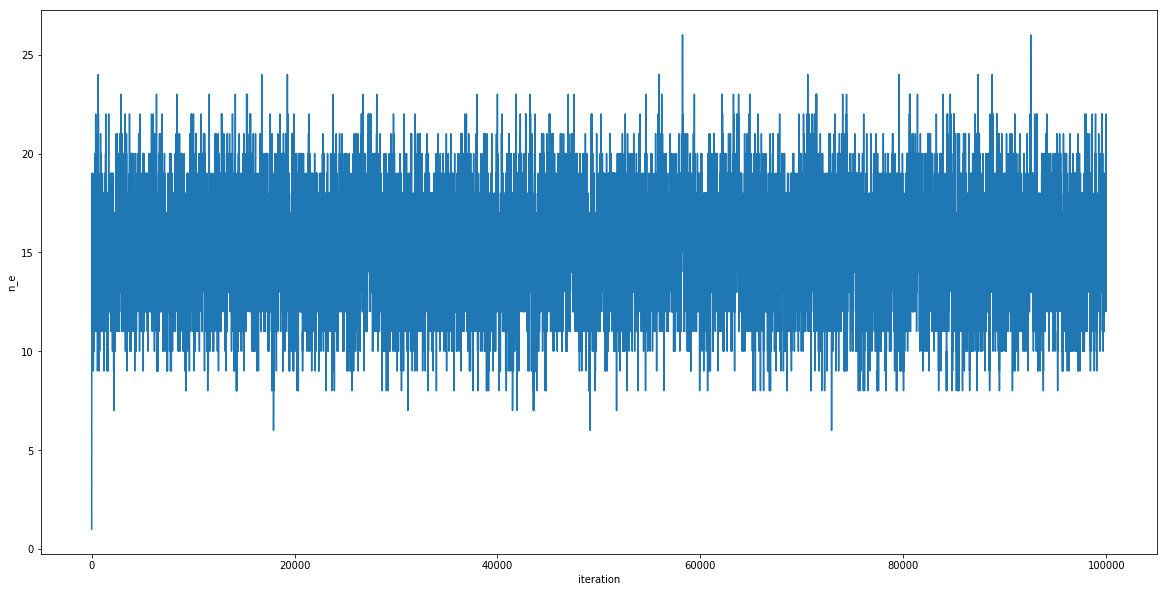

'график разброса (для доказательства)'

In [4]:
plt.figure(figsize = (20,10))
plt.plot(sam)
plt.ylabel("n_e")
plt.xlabel("iteration")
plt.show()
"""график разброса (для доказательства)"""

In [8]:
g_test(sam[10000:])

Ttest_indResult(statistic=-8.520428595739906, pvalue=1.613719575824292e-17)

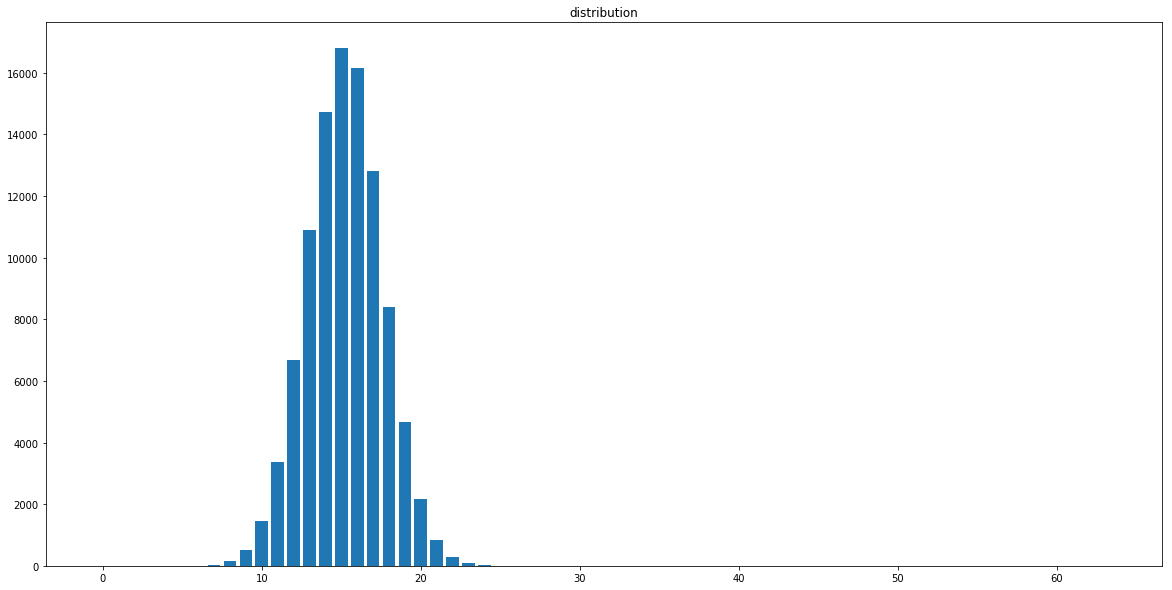

In [9]:
"""диграмма полученного распределения"""
plt.figure(figsize = (20,10))
plt.bar(np.arange(size**2), n_e)
plt.title("distribution")
plt.show()